In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# KMeans实现
def find_closest_centroids(X, centroids):
    m, n = X.shape
    idx = np.zeros(m, dtype=int)

    for i, p in enumerate(X):
        min_dist = 999999
        for j, c in enumerate(centroids):
            d = np.sum((p - c) ** 2)
            if d < min_dist:
                min_dist = d
                idx[i] = j

    return idx

In [3]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    cnt = np.zeros(K)

    for i, p in enumerate(X):
        centroids[idx[i]] += p
        cnt[idx[i]] += 1

    centroids /= cnt.reshape(-1, 1)
    return centroids

In [4]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    
    for i in range(max_iters):
        print(f'KMeans iter: {i+1}/{max_iters} ')
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

    return idx, centroids

In [5]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])

    centroids = X[randidx[:K]]    
    return centroids

In [6]:
# 载入数据
img_data = plt.imread('./Data/IMG.jpg')
# plt.imshow(img_data)

In [7]:
img_data.shape

(500, 500, 3)

In [8]:
X_img = np.reshape(img_data, (-1, 3))
X_img.shape

(250000, 3)

In [9]:
# 模型选择及训练
n_clusters = 16
max_iter = 10
initial_cen = kMeans_init_centroids(X_img, n_clusters)
idx, cens = run_kMeans(X_img, initial_cen, max_iter)

KMeans iter: 1/10 
KMeans iter: 2/10 
KMeans iter: 3/10 
KMeans iter: 4/10 
KMeans iter: 5/10 
KMeans iter: 6/10 
KMeans iter: 7/10 
KMeans iter: 8/10 
KMeans iter: 9/10 
KMeans iter: 10/10 


In [10]:
idx = find_closest_centroids(X_img, cens)
idx.shape

(250000,)

In [11]:
cens /= 255
X_recovered = cens[idx, :] 

X_recovered = np.reshape(X_recovered, img_data.shape)

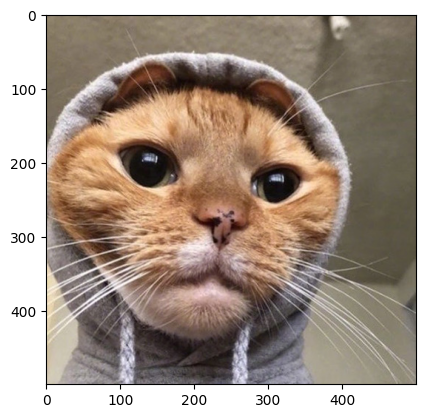

In [22]:
# 原数据
plt.imshow(img_data)

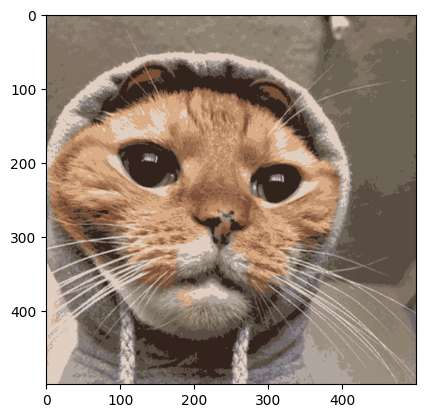

In [23]:
# 压缩后数据
plt.imshow(X_recovered)